In [1]:
'''Try Euler time-stepping for a simple array
Print pe,u's as said by Shubham G.
'''

"Try Euler time-stepping for a simple array\nPrint pe,u's as said by Shubham G.\n"

In [1]:
import numpy as np

In [2]:
np.arange(10)[1:-1]

array([1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
def Async_sim(num_grid):
    import delay_file
    import probability_initial
    import error_file
    import analytical_file
    import ic_file
    import numpy as np
    import matplotlib.pyplot as plt
    import timestep_file
    import FLAG_file
    import grid_file
    import input_file
    import step

    ## This cell remains same for Asynchronous compute ##
    Length=2*np.pi
    nx_=num_grid
    dx=Length/(nx_-1)
    x_=grid_file.grid_(dx,nx_)
    C=input_file.c
    init_c=ic_file.ic_(x_,amp=input_file.amp_ls,kappa=input_file.k_ls,phi=input_file.phi_ls,
                       num_k=input_file.numk,num_phi=input_file.numphi,Nx=nx_)
    dt=timestep_file.timestep_(dx,cfl=input_file.cfl,EqFLAG=FLAG_file.EqnFLAG,cx=input_file.c)
    Nt=input_file.N_t_
    arr_2d=[]
    # Nt=input_file.N_t_
    L=3
    u=init_c
    arr_2d.append(u)
    for k in range(L-1):
        rhs=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag='DSync')
        u=step.euler(u,rhs,dt,nx_)
        arr_2d.append(u)
    arr_2d=np.stack(arr_2d)

    num_PEs=input_file.numPE
    per_PEs=int((nx_)/(num_PEs))
    ps_i,pe_i=probability_initial.prob_2D_from_arr_2D(arr_2d[:-1],num_PEs,per_PEs,L-1)
    u=arr_2d[L-1]
    ls=[]
    ls.append(u)
    ps=ps_i
    pe=pe_i
    for j in range(Nt):
        ys,ye=probability_initial.prob_1D_from_u_1D(u,num_PEs,per_PEs)
        ps=np.vstack((ps,ys))
        pe=np.vstack((pe,ye))
        print(f'\n{j}th iteration pe is {pe} \n u is {u} ')
        rhs,ps,pe=step.cd2u1(u,C,dx,nx_,Eqflag=FLAG_file.EqnFLAG,Syncflag=FLAG_file.SyncFLAG,L=3,PE=num_PEs,perPE=per_PEs,
                             pstart=ps,pend=pe)
        
        u=step.euler(u,rhs,dt,nx_)
        
        ls.append(u)
        
    Nt_total=Nt+L-1
#     for i in range(40):
#         plt.plot(x_,ls[i*7])
    ana_soln=analytical_file.analytical_(x_,input_file.amp_ls,input_file.k_ls,input_file.phi_ls,input_file.numk,
                                    input_file.numphi,nx_,dt*Nt,C,0)
    error_Nx=error_file.error_MSE_(ana_soln,ls[-1])
    return error_Nx
    

In [4]:
Async_sim(8)


0th iteration pe is [[ 0.43388374 -0.78183148]
 [ 0.49023621 -0.8208286 ]
 [ 0.54489129 -0.85676714]] 
 u is [-0.12509304  0.70077867  0.99894975  0.54489129 -0.31948142 -0.94327811
 -0.85676714 -0.12509304] 

1th iteration pe is [[ 0.49023621 -0.8208286 ]
 [ 0.54489129 -0.85676714]
 [ 0.59995053 -0.88949454]] 
 u is [-0.18595733  0.65581696  1.00518524  0.59995053 -0.26214085 -0.92178668
 -0.88949454 -0.19063698] 

2th iteration pe is [[ 0.54489129 -0.85676714]
 [ 0.59995053 -0.88949454]
 [ 0.65064357 -0.91874053]] 
 u is [-0.24646069  0.60817126  1.0074199   0.65064357 -0.20347373 -0.89669253
 -0.91874053 -0.25424791] 

3th iteration pe is [[ 0.59995053 -0.88949454]
 [ 0.65064357 -0.91874053]
 [ 0.701426   -0.94443831]] 
 u is [-0.30636732  0.55801603  1.00572101  0.701426   -0.14158029 -0.86808186
 -0.94443831 -0.31532438] 

4th iteration pe is [[ 0.65064357 -0.91874053]
 [ 0.701426   -0.94443831]
 [ 0.74979379 -0.96654861]] 
 u is [-0.36543759  0.5055325   0.99998461  0.74979379 -

0.00370030074039128

In [2]:
x=np.arange(12).reshape(3,4)
y=np.arange(4,8)

NameError: name 'np' is not defined

In [ ]:
y

In [ ]:
x=np.vstack((x,y))

In [ ]:
x

NameError: name 'PE' is not defined

In [5]:
import matplotlib.pyplot as plt
import numpy as np
err=[]
n_list=64*np.arange(7,15)
print(n_list)
for n in n_list:
    err.append(Async_sim(n))
# plt.plot(n_list,err)

[448 512 576 640 704 768 832 896]

0th iteration pe is [[ 0.00702811 -0.01405588]
 [ 0.00815256 -0.01518024]
 [ 0.00927699 -0.01630458]] 
 u is [-0.00224894  0.01180714  0.0258609   0.03990954  0.05395029  0.06798039
  0.08199706  0.09599752  0.10997902  0.12393879  0.13787407  0.15178211
  0.16566017  0.17950549  0.19331534  0.207087    0.22081775  0.23450486
  0.24814564  0.2617374   0.27527744  0.28876309  0.30219169  0.31556059
  0.32886713  0.3421087   0.35528268  0.36838646  0.38141745  0.39437309
  0.40725081  0.42004806  0.43276232  0.44539108  0.45793183  0.47038212
  0.48273946  0.49500142  0.50716559  0.51922955  0.53119092  0.54304734
  0.55479646  0.56643598  0.57796357  0.58937697  0.60067393  0.6118522
  0.62290959  0.63384391  0.64465299  0.6553347   0.66588693  0.6763076
  0.68659465  0.69674604  0.70675977  0.71663385  0.72636635  0.73595534
  0.74539891  0.75469521  0.7638424   0.77283868  0.78168226  0.79037139
  0.79890436  0.80727949  0.81549512  0.82354963  0.831


3th iteration pe is [[ 0.00664241 -0.01108247]
 [ 0.0074146  -0.01179629]
 [ 0.00818674 -0.01250781]] 
 u is [-3.48926843e-03  5.36606603e-03  1.42999043e-02  2.32359407e-02
  3.21701667e-02  4.11018229e-02  5.00301958e-02  5.89545723e-02
  6.78742394e-02  7.67884845e-02  8.56965957e-02  9.45978613e-02
  1.03491570e-01  1.12377012e-01  1.21253477e-01  1.30120257e-01
  1.38976641e-01  1.47821925e-01  1.56655400e-01  1.65476361e-01
  1.74284104e-01  1.83077924e-01  1.91857121e-01  2.00620991e-01
  2.09368835e-01  2.18099955e-01  2.26813652e-01  2.35509232e-01
  2.44185998e-01  2.52843259e-01  2.61480322e-01  2.70096497e-01
  2.78691097e-01  2.87263435e-01  2.95812825e-01  3.04338586e-01
  3.12840036e-01  3.21316495e-01  3.29767287e-01  3.38191737e-01
  3.46589172e-01  3.54958920e-01  3.63300314e-01  3.71612687e-01
  3.79895375e-01  3.88147717e-01  3.96369052e-01  4.04558725e-01
  4.12716081e-01  4.20840469e-01  4.28931240e-01  4.36987747e-01
  4.45009346e-01  4.52995398e-01  4.60945263e


2th iteration pe is [[ 0.00499022 -0.00877063]
 [ 0.00564348 -0.00937548]
 [ 0.00627254 -0.00997839]] 
 u is [-0.0023953   0.00514148  0.01270216  0.02026211  0.02782091  0.03537811
  0.0429333   0.05048602  0.05803586  0.06558239  0.07312516  0.08066376
  0.08819774  0.09572668  0.10325015  0.11076771  0.11827895  0.12578342
  0.1332807   0.14077036  0.14825197  0.15572511  0.16318935  0.17064425
  0.1780894   0.18552437  0.19294874  0.20036207  0.20776395  0.21515395
  0.22253165  0.22989663  0.23724847  0.24458674  0.25191103  0.25922092
  0.26651599  0.27379582  0.28106001  0.28830812  0.29553975  0.30275449
  0.30995192  0.31713162  0.3242932   0.33143624  0.33856033  0.34566507
  0.35275005  0.35981486  0.3668591   0.37388236  0.38088426  0.38786437
  0.39482232  0.40175769  0.4086701   0.41555914  0.42242443  0.42926556
  0.43608216  0.44287382  0.44964017  0.45638081  0.46309537  0.46978344
  0.47644466  0.48307865  0.48968501  0.49626338  0.50281339  0.50933464
  0.51582678  

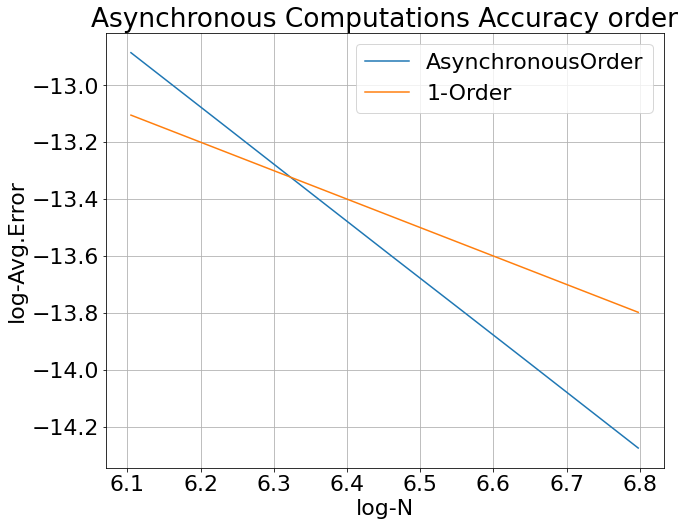

In [6]:
import numpy as np
def plot_error(n_list,err,comptype='Synchronous',order=2):
    # plt.plot(n_list,err)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(10,8))
    plt.plot(np.log(n_list),np.log(err),label=f'{comptype}Order')
    plt.plot(np.log(n_list),-order*np.log(n_list)-7,label=f'{order}-Order')
    plt.title(f"{comptype} Computations Accuracy order")
    plt.xlabel("log-N")
    plt.ylabel("log-Avg.Error")
    plt.legend()
    plt.grid()
plot_error(n_list,err,'Asynchronous',1)

In [5]:
plt.plot(np.log(n_list),np.log(err))
plt.plot(np.log(n_list),-1*np.log(n_list))

NameError: name 'plt' is not defined

In [1]:
import delay_file

In [2]:
x=0
for i in range(10000):
    x+=delay_file.delay_()

In [3]:
x/10000

1.984